# 1. Dot Product

Write a function `matrix_multiply(A, B)` using for loops, `+` and `*` that takes in two matrices (can be list of lists, or 2d numpy array) and returns their dot product (matrix multiplication). It should work with column vectors ($k \times 1$ dimensions) and row vectors ($1 \times k$) normally.


```import numpy as np

A = [
    [1,2,3],
    [4,5,6]
]

B = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

matrix_multiply(A,B)

RETURNS: 
[[30, 36, 42],
 [66, 81, 96]]

---------example 2-------------
# This is a row vector
A = np.array([
    [1,2,3]
])

# This is a column vector
B = np.array([
    [1],
    [4],
    [7]
])

matrix_multiply(A,B)

RETURNS:
[[30]]

```

Use `np.dot` to test your output

Using
$$
c_{i j}=a_{i 1} b_{1 j}+a_{i 2} b_{2 j}+\cdots+a_{i n} b_{n j}=\sum_{k=1}^{n} a_{i k} b_{k j}
$$

In [132]:
import numpy as np


def matrix_multiply(A,B):
    A=np.array(A)
    B=np.array(B)
    M=np.zeros([np.shape(A)[0],np.shape(B)[1]])
    for i in range(np.shape(M)[0]):
        for j in range(np.shape(M)[1]):
            for n in range(np.shape(A)[1]):
                M[i,j]+=A[i,n]*B[n,j]
    return M

    

A1 = [
    [1,2,3],
    [4,5,6]
]

B1 = [
    [1,2,3],
    [4,5,6],
    [7,8,9]
]

# This is a row vector
A2= np.array([
    [1,2,3]
])

# This is a column vector
B2 = np.array([
    [1],
    [4],
    [7]
])

M2=matrix_multiply(A2,B2)
M1=matrix_multiply(A1,B1)

print(M1,'\n')
print(M2)


[[30. 36. 42.]
 [66. 81. 96.]] 

[[30.]]


# 2 Matrix Math torture

**2.1** Give a 3 examples of non-invertible square matrices that are non-zero

**2.2** Explain why the identity matrix $I$ is necessarily a square matrix with only $1$'s on the diagonal (hint: use the dot product from Q1)

**2.3** The **trace** is commutative for two matrices so $tr(AB) = tr(BA)$. Give an example where this is false for 3 matrices which can all be multiplied together.

**2.4** Give an example of a nonzero $4 \times 4$ idempotent matrix (where $A \cdot A = A^2 = A$)

**2.5** solve the following system of equations for `x`, `y` and `z` using matrices and `numpy.linalg.solve`

$$x 	+ 	y 	+ 	z 	= 	6$$

  	  	$$2y 	+ 	5z 	= 	−4$$

$$2x 	+ 	5y 	− 	z 	= 	27$$

In [133]:
#2.1
#Is a matrix is singular (or degenerate)
#the matrix is non-invertible.
# A square matrix is singular if and only if its determinant is zero.
M1=np.array([[1,1,1],[2,2,2],[7,-2,4]])
M2=np.array([[0,0,0],[2,2,2],[7,-2,4]])
M3=np.array([[0,1,1],[5,1,1],[1,1,1]])

detM3=np.linalg.det(M3)
detM2=np.linalg.det(M2)
detM1=np.linalg.det(M1)

print(F'detM1={detM1}')
print(F'detM2={detM2}')
print(F'detM3={detM3}')



detM1=0.0
detM2=0.0
detM3=0.0


In [134]:
#2.2
#IA=A ( or AI=A)
print('A=',M1,'\n')
print('AI=',M1@np.eye(3),'\n')
print('IA=',np.eye(3)@M1,'\n')


A= [[ 1  1  1]
 [ 2  2  2]
 [ 7 -2  4]] 

AI= [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 7. -2.  4.]] 

IA= [[ 1.  1.  1.]
 [ 2.  2.  2.]
 [ 7. -2.  4.]] 



In [135]:
#2.3
tr1=np.trace(M1@M2@M3)
tr2=np.trace(M2@M1@M3)
print(tr1,tr2)

60 81


In [136]:
#2.4
M_idemp=np.array([[1/2,1/2],[1/2,1/2]])

M_Squared=M_idemp@M_idemp

print(M_Squared)

[[0.5 0.5]
 [0.5 0.5]]


In [137]:




#2.5
a=np.array([[1,1,1],[0,2,5],[2,5,-1]])
b=np.array([6,-4,27])
w = np.linalg.solve(a, b)
#test if  the solution is correct
test=np.allclose(np.dot(a, w), b)
if test==True:
    print(w)



[ 5.  3. -2.]


# 3.1 Boston regression

Using statsmodels and the `boston` dataset, make a regression model to predict house prices. Don't forget to add a constant (intercept) term. Note that statsmodels can take a `pd.DataFrame` as an input for `X`.

Report the $R^2$ and coefficients on each feature

In [138]:
import pandas as pd 
from sklearn.datasets import load_boston 
import matplotlib.pylab as plt 
import statsmodels.api as sm
import seaborn as sns

boston = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
y = load_boston().target
#adding a constant (intercept) term
X = sm.add_constant(boston)
#X = X.drop(columns=['INDUS', 'AGE'])
reg=sm.OLS(y, X).fit()
#display(reg.summary())
#display(reg.bse)
#display(reg.params)
result=pd.DataFrame({'coef':reg.params,
                     'std_err':reg.bse})


print(F'R\u00b2={reg.rsquared}')
print('\n----------------')
display(result)



reg.summary()




R²=0.7406426641094095

----------------


,coef,std_err
const,36.459488,5.103459
CRIM,-0.108011,0.032865
ZN,0.046420,0.013727
INDUS,0.020559,0.061496
CHAS,2.686734,0.861580
NOX,-17.766611,3.819744
RM,3.809865,0.417925
AGE,0.000692,0.013210
DIS,-1.475567,0.199455
RAD,0.306049,0.066346


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        19:57:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3.2 Polynomial features

Use polynomial features to improve your regression model in `2.1`. You can use squared and cubic features. Try to find a model that minimizes the `AIC` or `BIC` of your output table.

In [139]:
X=boston

X=X.drop(columns=['INDUS','AGE'])

X_sq=X.apply(np.square)
X_cu=X**3

X_sq.columns=X.columns+'_sq'
X_cu.columns=X.columns+'_cu'

X_tot=pd.concat((X,X_sq),axis=1)
X_tot2=pd.concat((X_tot,X_cu),axis=1)

X_tot = sm.add_constant(X_tot)
X_tot2 = sm.add_constant(X_tot2)


reg=sm.OLS(y, X_tot).fit()
reg2=sm.OLS(y, X_tot2).fit()


y_pred=reg.predict(X_tot)


X_sq=X.apply(np.square)
X_cu=X**3

X_sq.columns=X.columns+'_sq'
X_cu.columns=X.columns+'_cu'


X_tot=pd.concat((X,X_sq),axis=1)
X_tot2=pd.concat((X_tot,X_cu),axis=1)

X_tot = sm.add_constant(X_tot)
X_tot2 = sm.add_constant(X_tot2)


reg=sm.OLS(y, X_tot).fit()
reg2=sm.OLS(y, X_tot2).fit()


display(reg.summary())

display(reg2.summary())


#We're minimising BIC for this model
#the square feature is a better model for this dataset

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          1.68e-171
Time:                        19:57:17   Log-Likelihood:                -1390.8
No. Observations:                 506   AIC:                             2826.
Df Residuals:                     484   BIC:                             2919.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.6947     20.937      7.627      0.000     118.555     200.834
CRIM          -0.3781      0.084     -4.501      0.000      -0.543      -0.213
ZN            -0.0548      0.031     -1.768      0.078      -0.116       0.006
CHAS           1.2774      0.353      3.618      0.000       0.584       1.971
NOX          -20.0442     24.024     -0.834      0.404     -67.248      27.159
RM           -18.9023      2.769     -6.826      0.000     -24.343     -13.462
DIS           -2.7605      0.524     -5.272      0.000      -3.789      -1.732
RAD            0.5761      0.208      2.770      0.006       0.168       0.985
TAX           -0.0338      0.012     -2.906      0.004      -0.057      -0.011
PTRATIO       -5.2317      1.655     -3.161      0.002      -8.484      -1.979
B              0.0242      0.011      2.221      0.027       0.003       0.046
LSTAT         -1.3351      0.119    -11.204      0.000      -1.569      -1.101
CRIM_sq        0.0030      0.001      2.789      0.005       0.001       0.005
ZN_sq          0.0007      0.000      2.106      0.036    4.82e-05       0.001
CHAS_sq        1.2774      0.353      3.618      0.000       0.584       1.971
NOX_sq        -2.0339     17.676     -0.115      0.908     -36.764      32.697
RM_sq          1.7218      0.216      7.963      0.000       1.297       2.147
DIS_sq         0.1526      0.043      3.522      0.000       0.067       0.238
RAD_sq        -0.0100      0.008     -1.208      0.228      -0.026       0.006
TAX_sq      2.753e-05   1.46e-05      1.890      0.059   -1.09e-06    5.61e-05
PTRATIO_sq     0.1252      0.047      2.676      0.008       0.033       0.217
B_sq       -4.083e-05    2.4e-05     -1.704      0.089   -8.79e-05    6.24e-06
LSTAT_sq       0.0232      0.003      7.028      0.000       0.017       0.030
==============================================================================
Omnibus:                      153.702   Durbin-Watson:                   1.194
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2589.512
Skew:                           0.845   Prob(JB):                         0.00
Kurtosis:                      13.953   Cond. No.                     1.25e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     82.78
Date:                Sat, 16 Jan 2021   Prob (F-statistic):          5.73e-170
Time:                        19:57:17   Log-Likelihood:                -1370.0
No. Observations:                 506   AIC:                             2804.
Df Residuals:                     474   BIC:                             2939.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        155.1562     91.565      1.694      0.091     -24.768     335.080
CRIM          -0.6503      0.165     -3.944      0.000      -0.974      -0.326
ZN             0.0386      0.062      0.624      0.533      -0.083       0.160
CHAS           0.8545      0.230      3.708      0.000       0.402       1.307
NOX          379.3342    144.938      2.617      0.009      94.535     664.134
RM           -25.9062     15.864     -1.633      0.103     -57.079       5.266
DIS           -5.8808      1.337     -4.400      0.000      -8.507      -3.254
RAD            1.5948      0.662      2.409      0.016       0.294       2.896
TAX           -0.2052      0.064     -3.230      0.001      -0.330      -0.080
PTRATIO      -11.6968     14.822     -0.789      0.430     -40.822      17.429
B             -0.0032      0.028     -0.115      0.909      -0.057       0.051
LSTAT         -1.8787      0.285     -6.587      0.000      -2.439      -1.318
CRIM_sq        0.0125      0.005      2.367      0.018       0.002       0.023
ZN_sq         -0.0024      0.002     -1.200      0.231      -0.006       0.002
CHAS_sq        0.8545      0.230      3.708      0.000       0.402       1.307
NOX_sq      -654.4390    236.214     -2.771      0.006   -1118.594    -190.283
RM_sq          2.8412      2.529      1.123      0.262      -2.129       7.811
DIS_sq         0.8002      0.240      3.331      0.001       0.328       1.272
RAD_sq        -0.1721      0.095     -1.806      0.072      -0.359       0.015
TAX_sq         0.0005      0.000      2.975      0.003       0.000       0.001
PTRATIO_sq     0.5154      0.864      0.597      0.551      -1.182       2.213
B_sq           0.0001      0.000      0.793      0.428      -0.000       0.000
LSTAT_sq       0.0604      0.017      3.492      0.001       0.026       0.094
CRIM_cu    -7.937e-05    4.4e-05     -1.806      0.072      -0.000       7e-06
ZN_cu       2.432e-05   1.57e-05      1.552      0.121   -6.48e-06    5.51e-05
CHAS_cu        0.8545      0.230      3.708      0.000       0.402       1.307
NOX_cu       342.3962    125.060      2.738      0.006      96.655     588.137
RM_cu         -0.0581      0.132     -0.440      0.660      -0.318       0.202
DIS_cu        -0.0372      0.013     -2.820      0.005      -0.063      -0.011
RAD_cu         0.0052      0.003      1.759      0.079      -0.001       0.011
TAX_cu     -3.527e-07   1.22e-07     -2.896      0.004   -5.92e-07   -1.13e-07
PTRATIO_cu    -0.0077      0.017     -0.462      0.644      -0.040       0.025
B_cu       -2.345e-07   2.15e-07     -1.091      0.276   -6.57e-07    1.88e-07
LSTAT_cu      -0.0007      0.000     -2.232      0.026      -0.001   -8.43e-05
==============================================================================
Omnibus:                      131.765   Durbin-Watson:                   1.269
Pr

# 3.3 Feature plotting

Now that you have a better model, make a regression figure plot for the important feature. The regression plot should be like the ones made at the end of part 3 of this lecture (scatterplot + regression line). It should have the following:

- Have the `x` axis be the values from one of your important features. The values should range from the `[min, max]` of the observed values in the dataset.

- The y axis on each chart is the target value (house price)

- You should have a scatter plot of the datapoints for the feature + the regression line of predicted values on each

- If you used non-linearities (squared and/or cube input) the regression curve should be nonlinear as well

- When plotting values for a single variable, you can set all the other values to their `mean` or `median` when you put them in your model's prediction

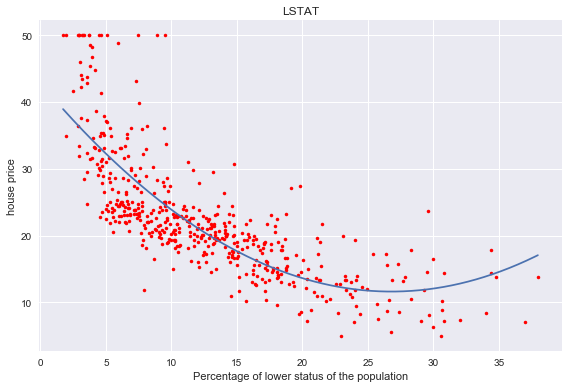

In [140]:
from sklearn.preprocessing import PolynomialFeatures


def reg_plot_on_ax2(feature,ax,deg):

    Dict={'CRIM': 'Per capita crime rate by town',
    'ZN':'Proportion of residential land zoned',
    'INDUS':'Proportion of non-retail business acres per town',
    'CHAS':'Charles River dummy variable',
    'NOX':'Nitric oxide concentration (parts per 10 million)',
    'RM':'Average number of rooms per dwelling',
    'AGE':'Proportion of owner-occupied units built prior to 1940',
    'DIS':'Weighted distances to five Boston employment centers',
    'RAD':'Index of accessibility to radial highways',
    'TAX':'Full-value property tax rate per $10,000',
    'PTRATIO':'Pupil-teacher ratio by town',
    'B': 'people of African American descent] by town',
    'LSTAT': 'Percentage of lower status of the population',
    'MEDV': 'Median value of owner-occupied homes'}

    plt.style.use('seaborn')
    X = pd.DataFrame(load_boston().data,columns = load_boston().feature_names )
    y = load_boston().target

    #array-->vector
    X_reg=X[feature][:, np.newaxis]


    polynomial_features= PolynomialFeatures(degree=deg)
    x=polynomial_features.fit_transform(X_reg)

    #regression
    reg=sm.OLS(y, x).fit()

    xmax=X_reg.max()
    xmin=X_reg.min()

    x_fit=np.linspace(xmin,xmax,1000)
    x_fit = x_fit[:, np.newaxis]
    x_fit=polynomial_features.fit_transform(x_fit)

    y_fit = reg.predict(x_fit[:, np.newaxis])



    ax.plot(X_reg,y,'.r')
    ax.plot(x_fit[:,1], y_fit)
    ax.set_ylabel('house price')
    ax.set_xlabel(Dict[feature])
    #ax.set_xlabel(fea)
    ax.set_title(feature)

    plt.tight_layout() 

fig,ax=plt.subplots()

reg_plot_on_ax2('LSTAT',ax,2)


# 3.4 Multi-feature plotting

Make a single matplotlib `figure` object with the same chart as in **2.4** but with 4 charts instead for your 4 most important features. 

Do not copy-paste code for each feature you visualize in the plot. Extract your code into a function so you can just have something like

```python
fix, ax1, ax2, ax3, ax4 = plt.subplots((2,2))
reg_plot_on_ax(feature_1, ax1)
reg_plot_on_ax(feature_2, ax2)
reg_plot_on_ax(feature_3, ax3)
reg_plot_on_ax(feature_4, ax4)
```

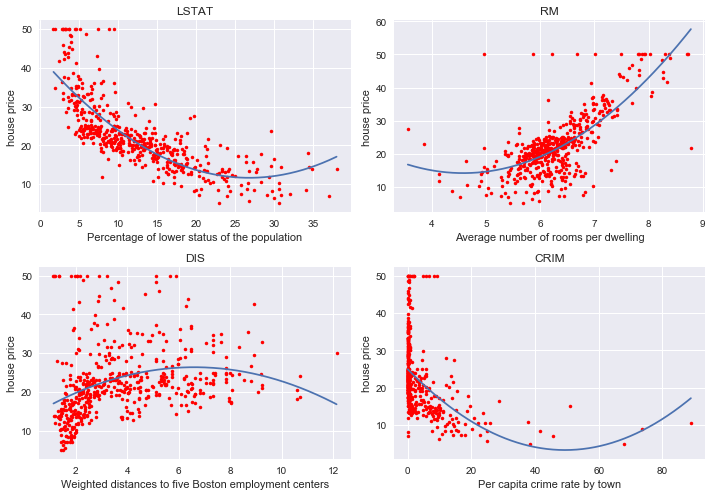

In [142]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 7))



reg_plot_on_ax2('LSTAT', ax1,2)
reg_plot_on_ax2('RM', ax2,2)
reg_plot_on_ax2('DIS', ax3,2)
reg_plot_on_ax2('CRIM', ax4,2)




